<a href="https://colab.research.google.com/github/drihn/CCDATSCL_COM221_EXERCISES/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [33]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [34]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [35]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [36]:
df.shape

(48895, 16)

Identify the numerical features:

In [37]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Identify the categorical features

In [38]:
categorial_features = df.select_dtypes(include=np.object_).columns.tolist()
print("Categorial features:", categorial_features)

Categorial features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


What are the top 5 questions this dataset might help answer?

In [39]:
#1. How does rental price vary across different neighborhoods (boroughs or sub-neighborhoods) in New York City?
#2. How does the type of listing (e.g entire home/apartment, private room and shared room) affect price per night?
#3. Is there a relationship between availability and price or booking popularity?
#4. How does review activity correlate with price, location or room type?
#5. Which neighborhoods or listing types offer the best value for guest?

## B. Structuring

Check if the dataset has proper column types

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check if the dataset has index issues

In [41]:
print(df.index.is_unique)
print(type(df.index))
print(df.index)

True
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=48895, step=1)


Check if the dataset has duplicated rows

In [42]:
print(df.duplicated().sum())

0


Convert columns to correct types (e.g., dates → datetime).

In [43]:
df['last_review'] = pd.to_datetime(df['last_review'])

Identify at least one structural issue and describe how to fix it.

In [44]:
#The structural issue identified was the last_review column being of object (string) type instead of a proper datetime format. This hindered any temporal analysis. The fix involved converting this column to a datetime object using pd.to_datetime() as demonstrated in the code cell _iLsABNMMJcC.

## C. Cleaning



Check for missing values

In [45]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Check for outliers in `minimum_nights`

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


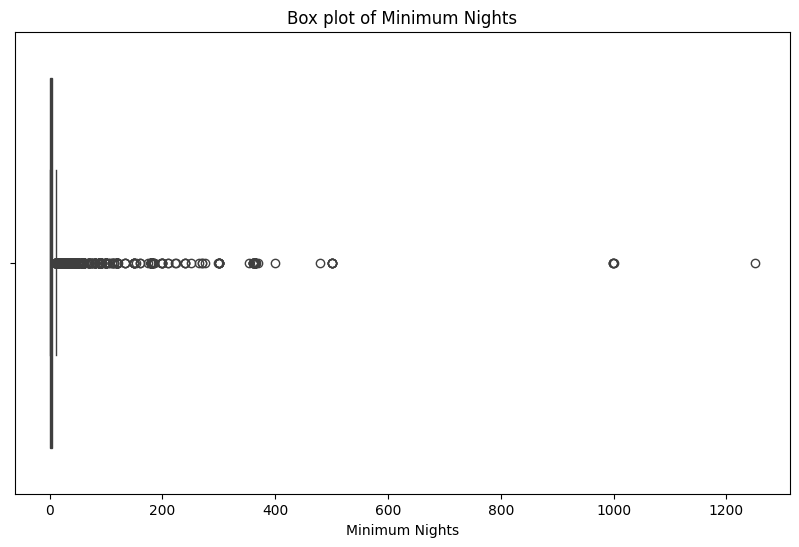

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['minimum_nights'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box plot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

Check for invalid values (e.g., price ≤ 0)

In [47]:
df[df['minimum_nights'] <= 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Apply a missing-value strategy (drop, fill, or flag)


In [48]:
df.dropna(subset=['last_review'], inplace=True)

Apply an outlier-handling strategy

In [49]:
upper_bound_min_nights = df['minimum_nights'].quantile(0.99)
df['minimum_nights'] = np.where(df['minimum_nights'] > upper_bound_min_nights,
df['minimum_nights'].quantile(0.99),
df['minimum_nights'])

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [50]:
# Calculate price_per_minimum_night
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']

# Use reviews_per_month directly for review_rate_per_month
df['review_rate_per_month'] = df['reviews_per_month']

# Calculate a price threshold (e.g., 75th percentile) for 'is_expensive'
price_threshold = df['price'].quantile(0.75)
df['is_expensive'] = df['price'] > price_threshold

print("New variables created:")
print(df[['price_per_minimum_night', 'review_rate_per_month', 'is_expensive']].head())

New variables created:
   price_per_minimum_night  review_rate_per_month  is_expensive
0               149.000000                   0.21         False
1               225.000000                   0.38          True
3                89.000000                   4.64         False
4                 8.000000                   0.10         False
5                66.666667                   0.59          True


Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [51]:
average_price_per_neighbourhood_group = df.groupby('neighbourhood_group')['price'].mean().reset_index()
print("Average price per neighbourhood group:")
display(average_price_per_neighbourhood_group)

Average price per neighbourhood group:


,neighbourhood_group,price
0,Bronx,79.553653
1,Brooklyn,121.448714
2,Manhattan,180.052489
3,Queens,95.762571
4,Staten Island,89.964968


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [52]:
violations_price_positive = (df['price'] <= 0).sum()
violations_hostid_null = df['host_id'].isnull().sum()
violations_min_nights_less_than_1 = (df['minimum_nights'] < 1).sum()

print(f"Rows violating 'Price must be positive': {violations_price_positive}")
print(f"Rows violating 'Host ID should not be null': {violations_hostid_null}")
print(f"Rows violating 'Minimum nights must be \u2265 1': {violations_min_nights_less_than_1}")

Rows violating 'Price must be positive': 10
Rows violating 'Host ID should not be null': 0
Rows violating 'Minimum nights must be ≥ 1': 0


In [53]:
check_price = df['price'] > 0
check_host = df['host_id'].notnull()
check_min_nights = df['minimum_nights'] >= 1
df["is_valid"] = check_price & check_host & check_min_nights

In [54]:
df = df[df['price'] > 0]
print(f"DataFrame shape after removing rows with non-positive prices: {df.shape}")

DataFrame shape after removing rows with non-positive prices: (38833, 20)


## F. Publishing

Select final columns for publication.



In [56]:
final_columns = df.columns.tolist()
print("Final columns selected for publication:", final_columns)

Final columns selected for publication: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_per_minimum_night', 'review_rate_per_month', 'is_expensive', 'is_valid']


Export cleaned dataset as "cleaned_airbnb.csv"

In [57]:
df.to_csv('cleaned_airbnb.csv', index=False)
print("Cleaned dataset exported to 'cleaned_airbnb.csv'")

Cleaned dataset exported to 'cleaned_airbnb.csv'


Export summary reports (e.g., validation or aggregations) as CSV.

In [58]:
average_price_per_neighbourhood_group = df.groupby('neighbourhood_group')['price'].mean().reset_index()
print("Average price per neighbourhood group:")
display(average_price_per_neighbourhood_group)

Average price per neighbourhood group:


,neighbourhood_group,price
0,Bronx,79.644571
1,Brooklyn,121.515209
2,Manhattan,180.052489
3,Queens,95.762571
4,Staten Island,89.964968


In [59]:
average_price_per_neighbourhood_group.to_csv('average_price_per_neighbourhood_group.csv', index=False)
print("Aggregated summary exported to 'average_price_per_neighbourhood_group.csv'")

Aggregated summary exported to 'average_price_per_neighbourhood_group.csv'
